In [1]:
import numpy as np
import pandas as pd

In [11]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [17]:
df = df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# **Steps**
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
import matplotlib.pyplot as plt

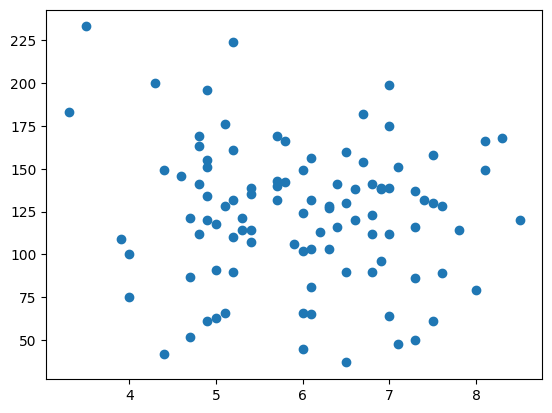

In [12]:
plt.scatter(df['cgpa'], df['iq'])

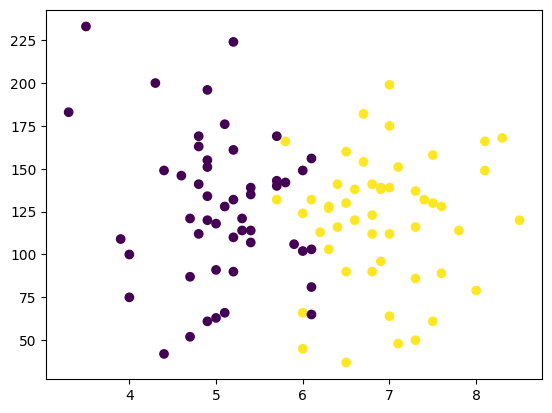

In [13]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [18]:
x = df.iloc[:, 0:2]
y = df.iloc[:,-1]

In [19]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [21]:
y.shape

(100,)

In [22]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [45]:
x_train

,cgpa,iq
48,6.6,138.0
32,7.0,139.0
50,3.5,233.0
38,6.5,160.0
28,5.2,90.0
...,...,...
31,3.9,109.0
18,4.0,100.0
81,5.4,107.0
87,5.7,132.0


In [46]:
y_train

48    1
32    1
50    0
38    1
28    0
     ..
31    0
18    0
81    0
87    1
94    0
Name: placement, Length: 90, dtype: int64

In [47]:
x_test

,cgpa,iq
47,5.2,161.0
91,7.5,158.0
26,7.0,199.0
97,6.7,182.0
11,6.9,138.0
66,6.9,96.0
54,6.4,141.0
2,5.3,121.0
73,4.9,61.0
88,4.4,149.0


In [48]:
y_test

47    0
91    1
26    1
97    1
11    1
66    1
54    1
2     0
73    0
88    0
Name: placement, dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 0.54203809,  0.41340082],
       [ 0.88987003,  0.43874556],
       [-2.15365938,  2.82115085],
       [ 0.45508011,  0.97098504],
       [-0.67537367, -0.80314656],
       [ 0.97682801,  0.7428824 ],
       [-0.5014577 ,  0.33736661],
       [-0.93624762,  1.88339557],
       [-1.19712156,  0.61615872],
       [-0.93624762, -0.04280444],
       [ 0.88987003, -0.24556234],
       [ 2.0203238 ,  1.17374293],
       [ 1.32465994, -1.53814393],
       [ 2.19423977, -0.04280444],
       [ 1.15074397, -0.90452551],
       [-0.76233165,  0.15995345],
       [ 0.28116414,  0.15995345],
       [ 0.71595406,  0.03322977],
       [ 0.45508011,  0.21064293],
       [ 1.15074397, -1.81693604],
       [ 0.28116414,  0.13460871],
       [-0.15362577,  1.12305346],
       [-0.24058375,  0.4640903 ],
       [ 0.45508011, -2.14641762],
       [-0.06666779, -0.39763076],
       [ 1.23770196,  0.2613324 ],
       [ 0.0202902 , -1.94365973],
       [-1.0232056 ,  0.48943503],
       [-1.11016358,

In [52]:
x_test = scaler.transform(x_test)
x_test

array([[-0.67537367,  0.99632978],
       [ 1.32465994,  0.92029556],
       [ 0.88987003,  1.95942978],
       [ 0.62899608,  1.52856925],
       [ 0.80291204,  0.41340082],
       [ 0.80291204, -0.65107813],
       [ 0.36812213,  0.48943503],
       [-0.58841568, -0.01745971],
       [-0.93624762, -1.53814393],
       [-1.37103753,  0.69219293]])

In [33]:
from sklearn.linear_model import LogisticRegression

In [53]:
clf = LogisticRegression()

In [54]:
# model training
clf.fit(x_train, y_train)

LogisticRegression()

In [55]:
# evaluation
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [56]:
y_test

47    0
91    1
26    1
97    1
11    1
66    1
54    1
2     0
73    0
88    0
Name: placement, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test, y_pred)

1.0

In [58]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

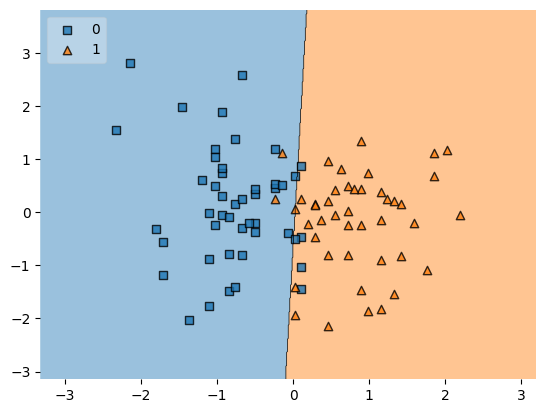

In [60]:
plot_decision_regions(x_train,y_train.values,clf=clf, legend=2)

In [61]:
import pickle

In [62]:
pickle.dump(clf, open('model.pkl','wb'))